In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

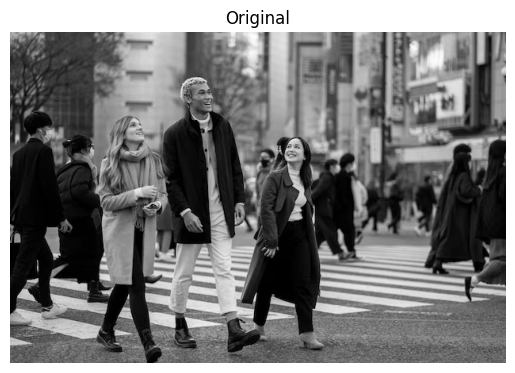

In [2]:
img = cv2.imread("data/hw.jpg",0)

plt.figure(), plt.title("Original"), plt.imshow(img, cmap="gray"), plt.axis("off");

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load Haar cascade (Ensure correct path)
haar_path = cv2.data.haarcascades + "data/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(haar_path)

# Check if cascade is loaded properly
if face_cascade.empty():
    raise IOError("Error loading Haar cascade. Check the file path!")

# Read image & convert to grayscale
img = cv2.imread("data/hw.jpg")  # Replace with your image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces with improved parameters
faces = face_cascade.detectMultiScale(
    gray, 
    scaleFactor=1.05,  # Smaller steps for accuracy
    minNeighbors=6,     # Reduce false positives
    minSize=(50, 50),   # Ignore very small detections
    maxSize=(500, 500)  # Ignore large background detections
)

# Draw bounding boxes around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 4)

# Display the image
plt.figure(figsize=(10, 10))
plt.title("Face Detection Result")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.axis("off")
plt.show()


OSError: Error loading Haar cascade. Check the file path!

# Cascade Classifier

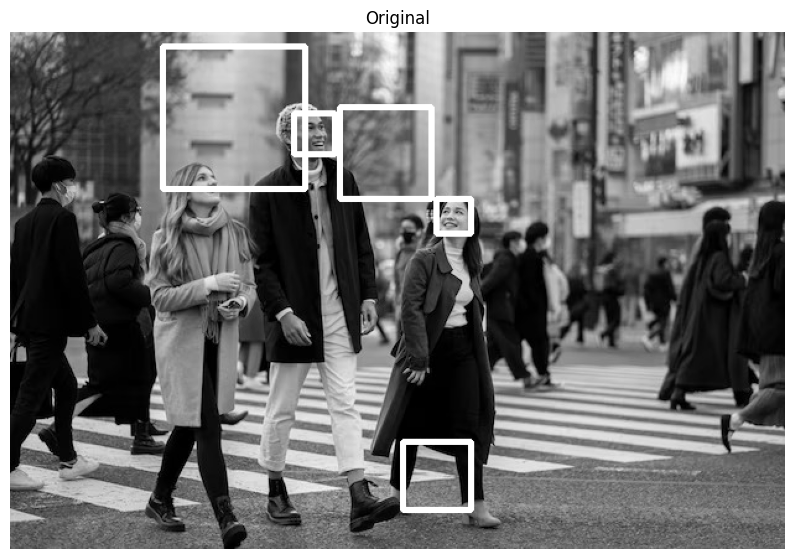

In [3]:
face = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")

face_rectangle = face.detectMultiScale(image=img, scaleFactor=1.08, minNeighbors=3)

for x,y,w,h in face_rectangle:
    
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 4)
    
plt.figure(figsize=(10,10)), plt.title("Original"), plt.imshow(img, cmap="gray"), plt.axis("off");

In [8]:
import cv2
print(cv2.__file__)  # Check OpenCV installation path
print(cv2.data.haarcascades)  # Check where OpenCV looks for Haar cascades

C:\Users\sruth\AppData\Roaming\Python\Python37\site-packages\cv2\__init__.py
C:\Users\sruth\AppData\Roaming\Python\Python37\site-packages\cv2\data\


In [7]:
import cv2
import matplotlib.pyplot as plt

# Load Image
img = cv2.imread("data/hw.jpg")

# Check if image loaded
if img is None:
    raise FileNotFoundError("Image file not found! Check the path.")

# Convert to Grayscale & Preprocess
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)  # Improve contrast
gray = cv2.GaussianBlur(gray, (5,5), 0)  # Reduce noise

face = cv2.CascadeClassifier(cv2.data.haarcascades + "data/haarcascade_frontalface_alt2.xml")
if face.empty():
    raise IOError("Haarcascade XML file not found! Check your OpenCV installation.")

# Detect Faces
face_rectangle = face.detectMultiScale(
    gray,
    scaleFactor=1.05,  # Detect smaller faces
    minNeighbors=5,    # Balance between false positives and missing faces
    minSize=(30, 30),  # Detect smaller faces
    maxSize=(500, 500) # Prevent background noise
)

# Debugging: Print detected faces count
print("Detected faces:", len(face_rectangle))

# Draw Rectangles Around Faces
for (x, y, w, h) in face_rectangle:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 4)

# Display Result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Face Detection")
plt.show()


OSError: Haarcascade XML file not found! Check your OpenCV installation.

# HOG Descriptor

In [ ]:
# read again
img = cv2.imread("data/hw.jpg",0)

# define hog Descriptor
hog = cv2.HOGDescriptor()

# add SVM
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect
(rects, weights) = hog.detectMultiScale(img, padding=(5,5), scale=1.05)

sum_ = 0
for (i,(X,Y,W,H)) in enumerate(rects):
    
    cv2.rectangle(img, (X,Y), (X+W, Y+H), (255, 0, 0), 2)
    cv2.putText(img, f"{i+1}", (X-4, Y-4),cv2.FONT_HERSHEY_SIMPLEX, .75, (255,255,255),2)
    
    sum_ += 1

cv2.putText(img, f"SUM: {sum_}", (890, 90),cv2.FONT_HERSHEY_COMPLEX, 1.5, (255,0,0),2)
    
plt.figure(figsize=(10,10)), plt.title("Original"), plt.imshow(img,cmap="gray"), plt.axis("off");